In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:


# Load the dataset
df = pd.read_csv('../data/HR-Employee-Attrition.csv')

# Shape and columns
print("Shape of the dataset:", df.shape)
print("\nColumn names:\n", df.columns)

# Display first and last few records
print("\nFirst 5 rows:\n", df.head())
print("\nLast 5 rows:\n", df.tail())

# Check for null values
print("\nMissing values per column:\n", df.isnull().sum())

# Info about data types
print("\nDataset info:")
df.info()

# Unique values & class distribution
print("\nAttrition value counts:\n", df['Attrition'].value_counts())
print("\nUnique Job Roles:\n", df['JobRole'].unique())


Shape of the dataset: (1470, 35)

Column names:
 Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

First 5 rows:
    Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2 

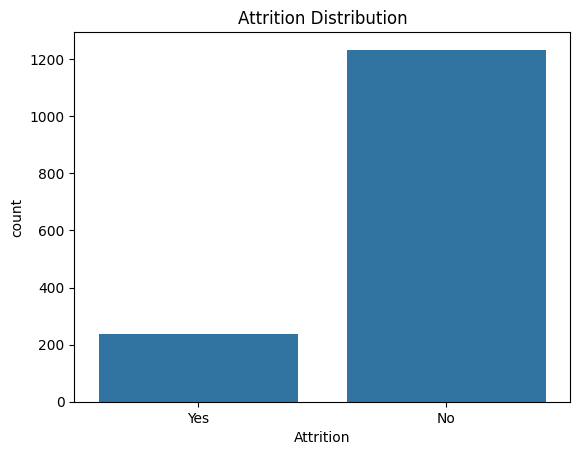

In [3]:
#Checking the target column balance
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Distribution')
plt.show()

In [4]:
# Percentage of attrition by Department
attrition_by_dept = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack()
print(attrition_by_dept)

attrition_by_job = df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack()
print(attrition_by_job)

attrition_by_genderrole = df.groupby('Gender')['Attrition'].value_counts(normalize=True).unstack()
print(attrition_by_genderrole)


Attrition                     No       Yes
Department                                
Human Resources         0.809524  0.190476
Research & Development  0.861602  0.138398
Sales                   0.793722  0.206278
Attrition                        No       Yes
JobRole                                      
Healthcare Representative  0.931298  0.068702
Human Resources            0.769231  0.230769
Laboratory Technician      0.760618  0.239382
Manager                    0.950980  0.049020
Manufacturing Director     0.931034  0.068966
Research Director          0.975000  0.025000
Research Scientist         0.839041  0.160959
Sales Executive            0.825153  0.174847
Sales Representative       0.602410  0.397590
Attrition        No       Yes
Gender                       
Female     0.852041  0.147959
Male       0.829932  0.170068


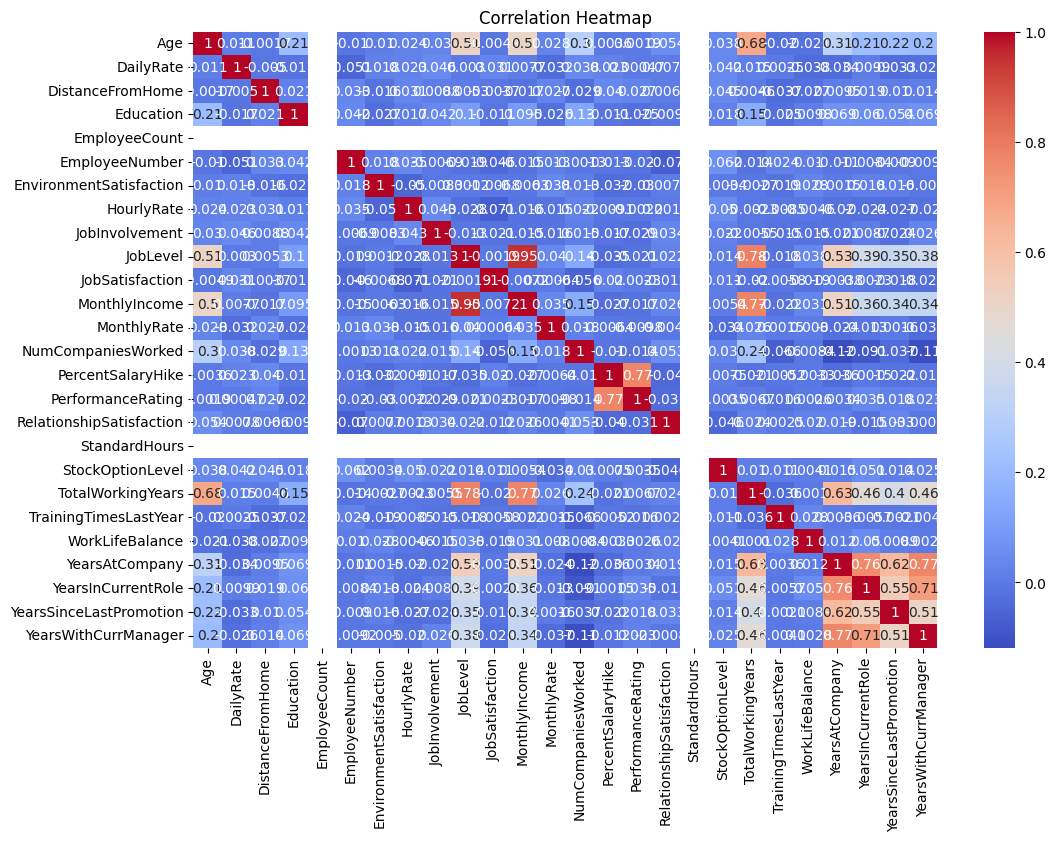

In [5]:
#Checking corelations 
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [6]:
#Since attrition is categorical , its not included 
# Convert 'Attrition' to 1/0
df['Attrition_Encoded'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Correlation with target
correlations = df.corr(numeric_only=True)['Attrition_Encoded'].sort_values(ascending=False)
print(correlations)

Attrition_Encoded           1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
EmployeeCount                    NaN
StandardHours                    NaN
N